# Experiment 2: Metafeature Relations

In [1]:
# Import external libraries
import pandas as pd
import pickle
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Import internal metalearning libraries
from src.metalearning.metadata import MetaDataset
from src.utils.metafeature_utils import pca_rank_cor, size

### Load dataset

In [2]:
# Initialize metadataset and calculate metafeatures
metadataset_sample_names = !ls ../../data/metadata/interim
metasamples = [pickle.load(open('../../data/metadata/interim/' + sample_name,"rb")) for sample_name in metadataset_sample_names]# if '8760' not in sample_name and 'dif' not in sample_name]
metadataset = MetaDataset(metasamples, metafeature_functions=[size, pca_rank_cor])
data = metadataset.metafeature_set

Calculate metafeatures of metasamples: 100%|██████████| 32/32 [00:01<00:00, 23.80it/s]


### Some pandas wrangling

In [3]:
# specify number of best configurations per dataset to include
nr_best_configs = 1

# make dataframe of concatenated best configurations with its metafeatures
df = pd.concat([data]*nr_best_configs)
hyperparameters = metadataset.metasamples[0].get_best_hyperparameters(1)[0].keys()
for hyperp in hyperparameters:
    lst = []
    for i in range(nr_best_configs):
        lst.extend([np.array([hyperps[hyperp] for hyperps in sample.get_best_hyperparameters(i+1)])[i] for sample in metadataset.metasamples])
    df[hyperp] = lst

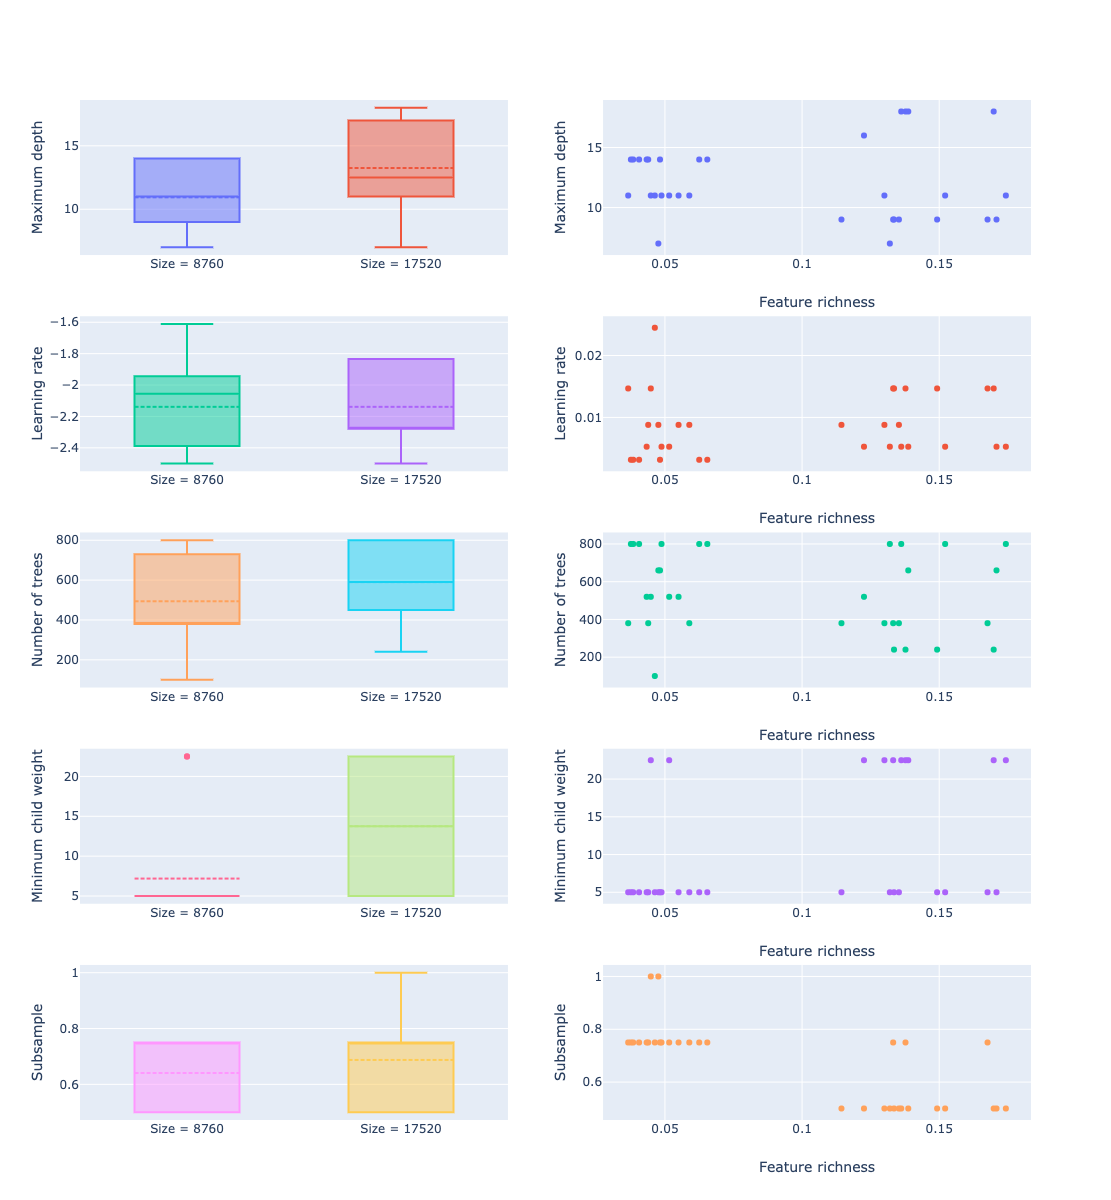

In [7]:
# size - hyperparameters
fig = make_subplots(
    rows=5,
    cols=2
)

# first row: size
fig.add_trace(go.Box(y=df.loc[df['size'] == 8760]['max_depth'],name='Size = 8760', boxmean=True), row=1, col=1)
fig.add_trace(go.Box(y=df.loc[df['size'] == 17520]['max_depth'],name='Size = 17520', boxmean=True), row=1, col=1)
fig.update_yaxes(title_text='Maximum depth', row=1, col=1)

fig.add_trace(go.Box(y=np.log10(df.loc[df['size'] == 8760]['learning_rate']),name='Size = 8760', boxmean=True), row=2, col=1)
fig.add_trace(go.Box(y=np.log10(df.loc[df['size'] == 17520]['learning_rate']),name='Size = 17520', boxmean=True), row=2, col=1)
fig.update_yaxes(title_text='Learning rate', row=2, col=1)

fig.add_trace(go.Box(y=df.loc[df['size'] == 8760]['num_trees'],name='Size = 8760', boxmean=True), row=3, col=1)
fig.add_trace(go.Box(y=df.loc[df['size'] == 17520]['num_trees'],name='Size = 17520', boxmean=True), row=3, col=1)
fig.update_yaxes(title_text='Number of trees', row=3, col=1)

fig.add_trace(go.Box(y=df.loc[df['size'] == 8760]['min_child_weight'],name='Size = 8760', boxmean=True), row=4, col=1)
fig.add_trace(go.Box(y=df.loc[df['size'] == 17520]['min_child_weight'],name='Size = 17520', boxmean=True), row=4, col=1)
fig.update_yaxes(title_text='Minimum child weight', row=4, col=1)

fig.add_trace(go.Box(y=df.loc[df['size'] == 8760]['subsample'],name='Size = 8760', boxmean=True), row=5, col=1)
fig.add_trace(go.Box(y=df.loc[df['size'] == 17520]['subsample'],name='Size = 17520', boxmean=True), row=5, col=1)
fig.update_yaxes(title_text='Subsample', row=5, col=1)

# second row: feature richness
fig.add_trace(go.Scatter(y=df['max_depth'],x=df['pca_rank_cor'], mode='markers'),row=1,col=2)
fig.update_yaxes(title_text='Maximum depth', row=1, col=2)
fig.update_xaxes(title_text='Feature richness', row=1, col=2)

fig.add_trace(go.Scatter(y=df['learning_rate'],x=df['pca_rank_cor'], mode='markers'),row=2,col=2)
fig.update_yaxes(title_text='Learning rate', row=2, col=2)
fig.update_xaxes(title_text='Feature richness', row=2, col=2)

fig.add_trace(go.Scatter(y=df['num_trees'],x=df['pca_rank_cor'], mode='markers'),row=3,col=2)
fig.update_yaxes(title_text='Number of trees', row=3, col=2)
fig.update_xaxes(title_text='Feature richness', row=3, col=2)

fig.add_trace(go.Scatter(y=df['min_child_weight'],x=df['pca_rank_cor'], mode='markers'),row=4,col=2)
fig.update_yaxes(title_text='Minimum child weight', row=4, col=2)
fig.update_xaxes(title_text='Feature richness', row=4, col=2)

fig.add_trace(go.Scatter(y=df['subsample'],x=df['pca_rank_cor'], mode='markers'),row=5,col=2)
fig.update_yaxes(title_text='Subsample', row=5, col=2)
fig.update_xaxes(title_text='Feature richness', row=5, col=2)

fig.update_layout(
    showlegend=False,
    height=1200
)

fig.show()

### Visualize

In [18]:
df

,size,pca_rank_cor,max_depth,learning_rate,num_trees,min_child_weight,subsample
COAST_box_17520,17520.0,0.043341,14.0,0.005275,520.0,5.0,0.75
COAST_box_8760,8760.0,0.043910,14.0,0.008799,380.0,5.0,0.75
COAST_diff_17520,17520.0,0.174295,11.0,0.005275,800.0,22.5,0.50
COAST_diff_8760,8760.0,0.170884,9.0,0.005275,660.0,5.0,0.50
EAST_box_17520,17520.0,0.047605,7.0,0.008799,660.0,5.0,1.00
EAST_box_8760,8760.0,0.051555,11.0,0.005275,520.0,22.5,0.75
EAST_diff_17520,17520.0,0.133211,9.0,0.014678,380.0,22.5,0.75
EAST_diff_8760,8760.0,0.132001,7.0,0.005275,800.0,5.0,0.50
FARWEST_box_17520,17520.0,0.054972,11.0,0.008799,520.0,5.0,0.75
FARWEST_box_8760,8760.0,0.058895,11.0,0.008799,380.0,5.0,0.75


In [24]:
df.loc[df['size'] == 17520][['subsample','pca_rank_cor']]

,subsample,pca_rank_cor
COAST_box_17520,0.75,0.043341
COAST_diff_17520,0.50,0.174295
EAST_box_17520,1.00,0.047605
EAST_diff_17520,0.75,0.133211
FARWEST_box_17520,0.75,0.054972
FARWEST_diff_17520,0.50,0.136156
NORTHC_box_17520,0.75,0.036613
NORTHC_diff_17520,0.75,0.137704
NORTH_box_17520,0.75,0.048759
NORTH_diff_17520,0.50,0.122575


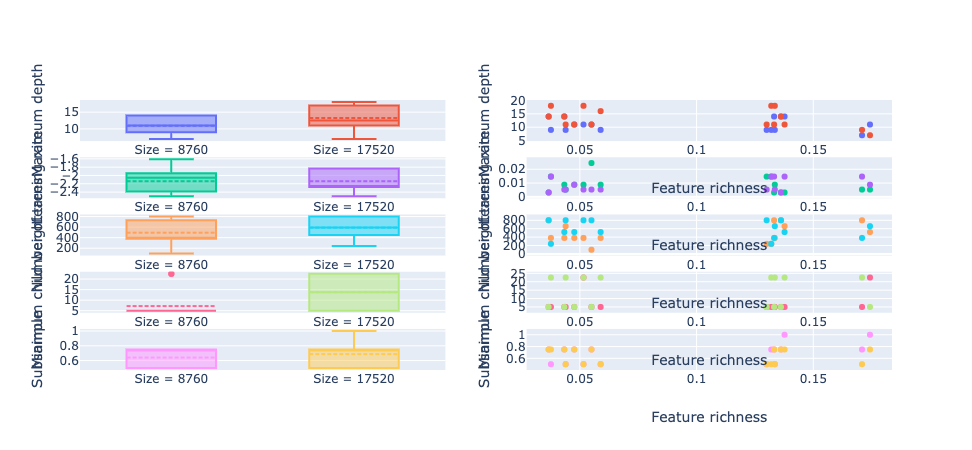

In [15]:
# size - hyperparameters
fig = make_subplots(
    rows=5,
    cols=2
)

# first row: size
fig.add_trace(go.Box(y=df.loc[df['size'] == 8760]['max_depth'],name='Size = 8760', boxmean=True), row=1, col=1)
fig.add_trace(go.Box(y=df.loc[df['size'] == 17520]['max_depth'],name='Size = 17520', boxmean=True), row=1, col=1)
fig.update_yaxes(title_text='Maximum depth', row=1, col=1)

fig.add_trace(go.Box(y=np.log10(df.loc[df['size'] == 8760]['learning_rate']),name='Size = 8760', boxmean=True), row=2, col=1)
fig.add_trace(go.Box(y=np.log10(df.loc[df['size'] == 17520]['learning_rate']),name='Size = 17520', boxmean=True), row=2, col=1)
fig.update_yaxes(title_text='Learning rate', row=2, col=1)

fig.add_trace(go.Box(y=df.loc[df['size'] == 8760]['num_trees'],name='Size = 8760', boxmean=True), row=3, col=1)
fig.add_trace(go.Box(y=df.loc[df['size'] == 17520]['num_trees'],name='Size = 17520', boxmean=True), row=3, col=1)
fig.update_yaxes(title_text='Number of trees', row=3, col=1)

fig.add_trace(go.Box(y=df.loc[df['size'] == 8760]['min_child_weight'],name='Size = 8760', boxmean=True), row=4, col=1)
fig.add_trace(go.Box(y=df.loc[df['size'] == 17520]['min_child_weight'],name='Size = 17520', boxmean=True), row=4, col=1)
fig.update_yaxes(title_text='Minimum child weight', row=4, col=1)

fig.add_trace(go.Box(y=df.loc[df['size'] == 8760]['subsample'],name='Size = 8760', boxmean=True), row=5, col=1)
fig.add_trace(go.Box(y=df.loc[df['size'] == 17520]['subsample'],name='Size = 17520', boxmean=True), row=5, col=1)
fig.update_yaxes(title_text='Subsample', row=5, col=1)

# second row: feature richness
fig.add_trace(go.Scatter(y=df.loc[df['size'] == 8760]['max_depth'],x=df['pca_rank_cor'], mode='markers'),row=1,col=2)
fig.add_trace(go.Scatter(y=df.loc[df['size'] == 17520]['max_depth'],x=df['pca_rank_cor'], mode='markers'),row=1,col=2)
fig.update_yaxes(title_text='Maximum depth', row=1, col=2)
fig.update_xaxes(title_text='Feature richness', row=1, col=2)

fig.add_trace(go.Scatter(y=df.loc[df['size'] == 8760]['learning_rate'],x=df['pca_rank_cor'], mode='markers'),row=2,col=2)
fig.add_trace(go.Scatter(y=df.loc[df['size'] == 17520]['learning_rate'],x=df['pca_rank_cor'], mode='markers'),row=2,col=2)
fig.update_yaxes(title_text='Learning rate', row=2, col=2)
fig.update_xaxes(title_text='Feature richness', row=2, col=2)

fig.add_trace(go.Scatter(y=df.loc[df['size'] == 8760]['num_trees'],x=df['pca_rank_cor'], mode='markers'),row=3,col=2)
fig.add_trace(go.Scatter(y=df.loc[df['size'] == 17520]['num_trees'],x=df['pca_rank_cor'], mode='markers'),row=3,col=2)
fig.update_yaxes(title_text='Number of trees', row=3, col=2)
fig.update_xaxes(title_text='Feature richness', row=3, col=2)

fig.add_trace(go.Scatter(y=df.loc[df['size'] == 8760]['min_child_weight'],x=df['pca_rank_cor'], mode='markers'),row=4,col=2)
fig.add_trace(go.Scatter(y=df.loc[df['size'] == 17520]['min_child_weight'],x=df['pca_rank_cor'], mode='markers'),row=4,col=2)
fig.update_yaxes(title_text='Minimum child weight', row=4, col=2)
fig.update_xaxes(title_text='Feature richness', row=4, col=2)

# fig.add_trace(go.Scatter(y=df['min_child_weight'],x=df['pca_rank_cor'], mode='markers'),row=5,col=2)
fig.add_trace(go.Scatter(y=df.loc[df['size'] == 17520]['subsample'],x=df['pca_rank_cor'], mode='markers'),row=5,col=2)
fig.add_trace(go.Scatter(y=df.loc[df['size'] == 8760]['subsample'],x=df['pca_rank_cor'], mode='markers'),row=5,col=2)
fig.update_yaxes(title_text='Subsample', row=5, col=2)
fig.update_xaxes(title_text='Feature richness', row=5, col=2)

fig.update_layout(
    showlegend=False,
    height=1200
)

fig.show()

In [20]:
df

,size,pca_rank_cor,max_depth,learning_rate,num_trees,min_child_weight,subsample
COAST_box_17520,17520.0,0.043341,14.0,0.005275,520.0,5.0,0.75
COAST_box_8760,8760.0,0.043910,14.0,0.008799,380.0,5.0,0.75
COAST_diff_17520,17520.0,0.174295,11.0,0.005275,800.0,22.5,0.50
COAST_diff_8760,8760.0,0.170884,9.0,0.005275,660.0,5.0,0.50
EAST_box_17520,17520.0,0.047605,7.0,0.008799,660.0,5.0,1.00
EAST_box_8760,8760.0,0.051555,11.0,0.005275,520.0,22.5,0.75
EAST_diff_17520,17520.0,0.133211,9.0,0.014678,380.0,22.5,0.75
EAST_diff_8760,8760.0,0.132001,7.0,0.005275,800.0,5.0,0.50
FARWEST_box_17520,17520.0,0.054972,11.0,0.008799,520.0,5.0,0.75
FARWEST_box_8760,8760.0,0.058895,11.0,0.008799,380.0,5.0,0.75


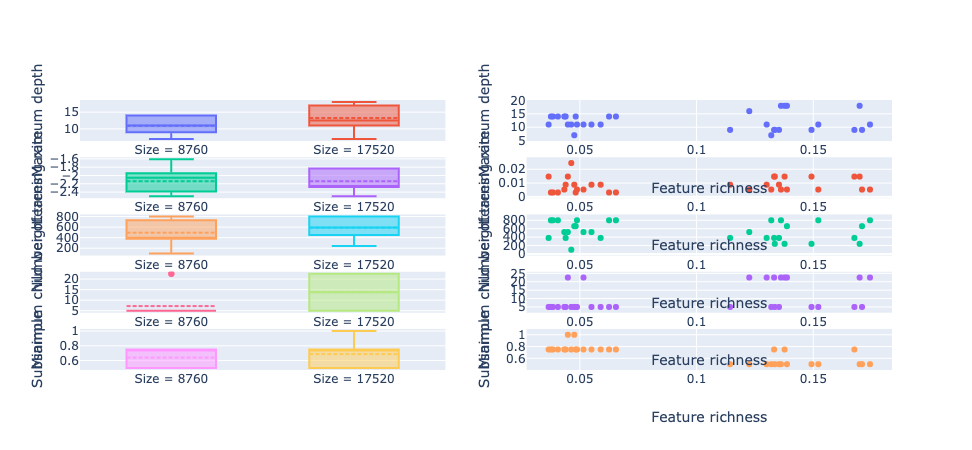

In [25]:
# size - hyperparameters
fig = make_subplots(
    rows=5,
    cols=2
)

# first row: size
fig.add_trace(go.Box(y=df.loc[df['size'] == 8760]['max_depth'],name='Size = 8760', boxmean=True), row=1, col=1)
fig.add_trace(go.Box(y=df.loc[df['size'] == 17520]['max_depth'],name='Size = 17520', boxmean=True), row=1, col=1)
fig.update_yaxes(title_text='Maximum depth', row=1, col=1)

fig.add_trace(go.Box(y=np.log10(df.loc[df['size'] == 8760]['learning_rate']),name='Size = 8760', boxmean=True), row=2, col=1)
fig.add_trace(go.Box(y=np.log10(df.loc[df['size'] == 17520]['learning_rate']),name='Size = 17520', boxmean=True), row=2, col=1)
fig.update_yaxes(title_text='Learning rate', row=2, col=1)

fig.add_trace(go.Box(y=df.loc[df['size'] == 8760]['num_trees'],name='Size = 8760', boxmean=True), row=3, col=1)
fig.add_trace(go.Box(y=df.loc[df['size'] == 17520]['num_trees'],name='Size = 17520', boxmean=True), row=3, col=1)
fig.update_yaxes(title_text='Number of trees', row=3, col=1)

fig.add_trace(go.Box(y=df.loc[df['size'] == 8760]['min_child_weight'],name='Size = 8760', boxmean=True), row=4, col=1)
fig.add_trace(go.Box(y=df.loc[df['size'] == 17520]['min_child_weight'],name='Size = 17520', boxmean=True), row=4, col=1)
fig.update_yaxes(title_text='Minimum child weight', row=4, col=1)

fig.add_trace(go.Box(y=df.loc[df['size'] == 8760]['subsample'],name='Size = 8760', boxmean=True), row=5, col=1)
fig.add_trace(go.Box(y=df.loc[df['size'] == 17520]['subsample'],name='Size = 17520', boxmean=True), row=5, col=1)
fig.update_yaxes(title_text='Subsample', row=5, col=1)

# second row: feature richness
fig.add_trace(go.Scatter(y=df['max_depth'],x=df['pca_rank_cor'], mode='markers'),row=,col=2)
fig.update_yaxes(title_text='Maximum depth', row=1, col=2)
fig.update_xaxes(title_text='Feature richness', row=1, col=2)

fig.add_trace(go.Scatter(y=df['learning_rate'],x=df['pca_rank_cor'], mode='markers'),row=2,col=2)
fig.update_yaxes(title_text='Learning rate', row=2, col=2)
fig.update_xaxes(title_text='Feature richness', row=2, col=2)

fig.add_trace(go.Scatter(y=df['num_trees'],x=df['pca_rank_cor'], mode='markers'),row=3,col=2)
fig.update_yaxes(title_text='Number of trees', row=3, col=2)
fig.update_xaxes(title_text='Feature richness', row=3, col=2)

fig.add_trace(go.Scatter(y=df['min_child_weight'],x=df['pca_rank_cor'], mode='markers'),row=4,col=2)
fig.update_yaxes(title_text='Minimum child weight', row=4, col=2)
fig.update_xaxes(title_text='Feature richness', row=4, col=2)

fig.add_trace(go.Scatter(y=df['subsample'],x=df['pca_rank_cor'], mode='markers'),row=5,col=2)
fig.update_yaxes(title_text='Subsample', row=5, col=2)
fig.update_xaxes(title_text='Feature richness', row=5, col=2)

fig.update_layout(
    showlegend=False,
    height=2000
)

fig.show()

### Old stuff

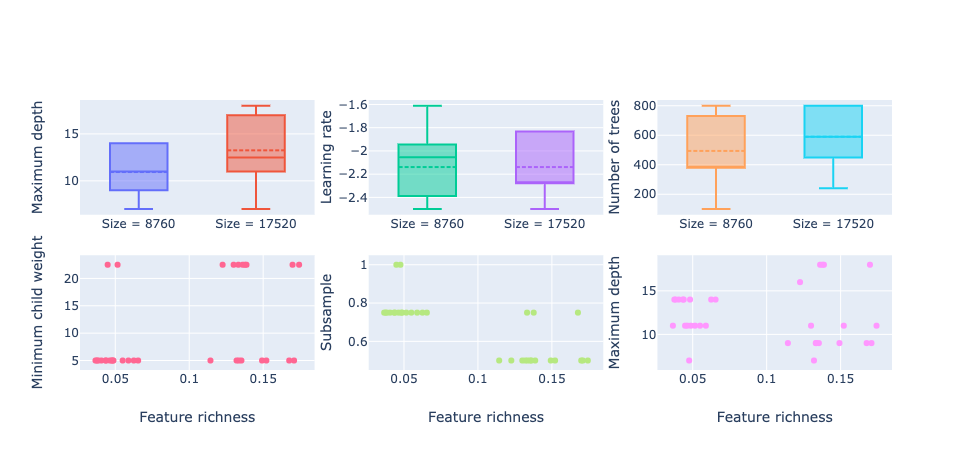

In [8]:
# size - hyperparameters
fig = make_subplots(
    rows=2,
    cols=3
)

# first row: size
fig.add_trace(go.Box(y=df.loc[df['size'] == 8760]['max_depth'],name='Size = 8760', boxmean=True), row=1, col=1)
fig.add_trace(go.Box(y=df.loc[df['size'] == 17520]['max_depth'],name='Size = 17520', boxmean=True), row=1, col=1)
fig.update_yaxes(title_text='Maximum depth', row=1, col=1)

fig.add_trace(go.Box(y=np.log10(df.loc[df['size'] == 8760]['learning_rate']),name='Size = 8760', boxmean=True), row=1, col=2)
fig.add_trace(go.Box(y=np.log10(df.loc[df['size'] == 17520]['learning_rate']),name='Size = 17520', boxmean=True), row=1, col=2)
fig.update_yaxes(title_text='Learning rate', row=1, col=2)

fig.add_trace(go.Box(y=df.loc[df['size'] == 8760]['num_trees'],name='Size = 8760', boxmean=True), row=1, col=3)
fig.add_trace(go.Box(y=df.loc[df['size'] == 17520]['num_trees'],name='Size = 17520', boxmean=True), row=1, col=3)
fig.update_yaxes(title_text='Number of trees', row=1, col=3)

# second row: feature richness
fig.add_trace(go.Scatter(y=df['min_child_weight'],x=df['pca_rank_cor'], mode='markers'),row=2,col=1)
fig.update_yaxes(title_text='Minimum child weight', row=2, col=1)
fig.update_xaxes(title_text='Feature richness', row=2, col=1)

fig.add_trace(go.Scatter(y=df['subsample'],x=df['pca_rank_cor'], mode='markers'),row=2,col=2)
fig.update_yaxes(title_text='Subsample', row=2, col=2)
fig.update_xaxes(title_text='Feature richness', row=2, col=2)

fig.add_trace(go.Scatter(y=df['max_depth'],x=df['pca_rank_cor'], mode='markers'),row=2,col=3)
fig.update_yaxes(title_text='Maximum depth', row=2, col=3)
fig.update_xaxes(title_text='Feature richness', row=2, col=3)

fig.update_layout(showlegend=False)

fig.show()

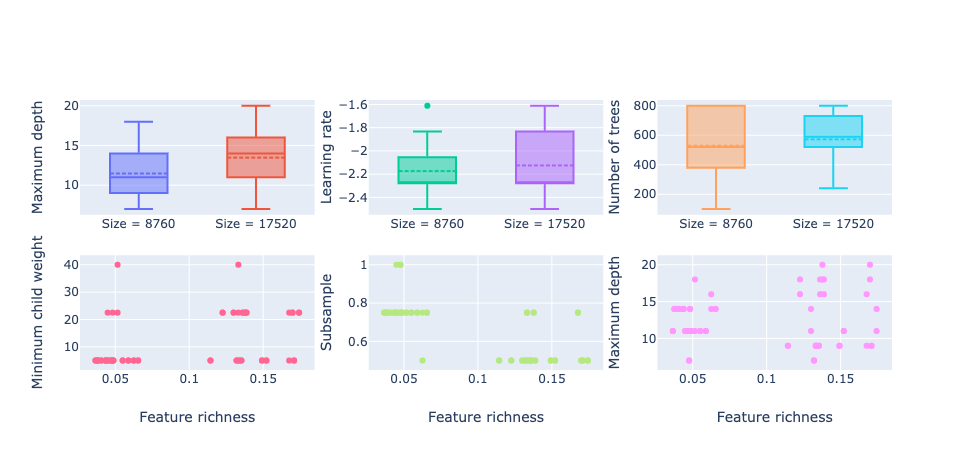

In [5]:
# size - hyperparameters
fig = make_subplots(
    rows=2,
    cols=3
)

# first row: size
fig.add_trace(go.Box(y=df.loc[df['size'] == 8760]['max_depth'],name='Size = 8760', boxmean=True), row=1, col=1)
fig.add_trace(go.Box(y=df.loc[df['size'] == 17520]['max_depth'],name='Size = 17520', boxmean=True), row=1, col=1)
fig.update_yaxes(title_text='Maximum depth', row=1, col=1)

fig.add_trace(go.Box(y=np.log10(df.loc[df['size'] == 8760]['learning_rate']),name='Size = 8760', boxmean=True), row=1, col=2)
fig.add_trace(go.Box(y=np.log10(df.loc[df['size'] == 17520]['learning_rate']),name='Size = 17520', boxmean=True), row=1, col=2)
fig.update_yaxes(title_text='Learning rate', row=1, col=2)

fig.add_trace(go.Box(y=df.loc[df['size'] == 8760]['num_trees'],name='Size = 8760', boxmean=True), row=1, col=3)
fig.add_trace(go.Box(y=df.loc[df['size'] == 17520]['num_trees'],name='Size = 17520', boxmean=True), row=1, col=3)
fig.update_yaxes(title_text='Number of trees', row=1, col=3)

# second row: feature richness
fig.add_trace(go.Scatter(y=df['min_child_weight'],x=df['pca_rank_cor'], mode='markers'),row=2,col=1)
fig.update_yaxes(title_text='Minimum child weight', row=2, col=1)
fig.update_xaxes(title_text='Feature richness', row=2, col=1)

fig.add_trace(go.Scatter(y=df['subsample'],x=df['pca_rank_cor'], mode='markers'),row=2,col=2)
fig.update_yaxes(title_text='Subsample', row=2, col=2)
fig.update_xaxes(title_text='Feature richness', row=2, col=2)

fig.add_trace(go.Scatter(y=df['max_depth'],x=df['pca_rank_cor'], mode='markers'),row=2,col=3)
fig.update_yaxes(title_text='Maximum depth', row=2, col=3)
fig.update_xaxes(title_text='Feature richness', row=2, col=3)

fig.update_layout(showlegend=False)

fig.show()